In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv('ml-100k/u1.base1')

In [3]:
Q = ratings.loc[:,str(1):].values

In [23]:
Q.shape

(943, 1647)

In [4]:
W = Q>0.5
W[W == True] = 1
W[W == False] = 0
W = W.astype(np.float64,copy = False)

In [5]:
W

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [6]:
lambda_ = 0.1
n_factors = 100
m, n = Q.shape
n_iterations = 20

In [7]:
X = 5 * np.random.rand(m, n_factors) 
Y = 5 * np.random.rand(n_factors, n)

In [8]:
Y

array([[ 3.46334553,  4.51464148,  1.39542207, ...,  2.91221694,
         1.56451468,  2.33180538],
       [ 0.64380007,  1.173456  ,  0.977965  , ...,  2.41441636,
         2.36047258,  2.45562966],
       [ 2.56542047,  4.63934136,  0.59163752, ...,  0.63836893,
         0.95882731,  1.80353814],
       ..., 
       [ 1.97625505,  3.48382944,  4.8099562 , ...,  1.96127595,
         4.1760083 ,  4.71834419],
       [ 1.00624982,  2.06081505,  2.35754665, ...,  2.54919578,
         2.68422614,  1.09079242],
       [ 2.39961871,  1.77564619,  4.53342226, ...,  0.16215704,
         1.77536696,  2.73714705]])

In [9]:
def get_error(Q, X, Y, W):
    return np.sum((W * (Q - np.dot(X, Y)))**2)

In [10]:
errors = []
for ii in range(n_iterations):
    X = np.linalg.solve(np.dot(Y, Y.T) + lambda_ * np.eye(n_factors), 
                        np.dot(Y, Q.T)).T
    Y = np.linalg.solve(np.dot(X.T, X) + lambda_ * np.eye(n_factors),
                        np.dot(X.T, Q))
    if ii % 100 == 0:
        print('{}th iteration is completed'.format(ii))
    errors.append(get_error(Q, X, Y, W))
Q_hat = np.dot(X, Y)
print('Error of rated movies: {}'.format(get_error(Q, X, Y, W)))

0th iteration is completed
Error of rated movies: 209415.07964


array([[ 0.11476402,  0.00781346, -0.06046303, ..., -0.04144   ,
         0.11461561, -0.0521411 ],
       [-0.05630217, -0.02989461, -0.10195431, ...,  0.00537277,
        -0.00675389,  0.00814634],
       [-0.00634976,  0.02434037,  0.06018177, ..., -0.02137126,
        -0.00876129, -0.00158172],
       ..., 
       [ 0.02055426, -0.00690503, -0.01821695, ...,  0.03087826,
        -0.02322267, -0.00107538],
       [-0.17470561,  0.08548969,  0.0736359 , ...,  0.11072766,
        -0.07550235, -0.08909467],
       [ 0.00957298, -0.09030323,  0.0728976 , ...,  0.02868151,
         0.13181728,  0.02444436]])

[414547.08194108127, 260266.3152262728, 237925.49577949339, 228707.45023148195, 223656.98967653877, 220452.79469097301, 218222.61063524144, 216567.04509585304, 215279.83236572772, 214244.33526833088, 213389.56430274723, 212669.64235362646, 212053.43756790378, 211518.97338195104, 211050.23710560412, 210635.26037611108, 210264.90810211751, 209932.08167514423, 209631.17628266593, 209357.70119444866]


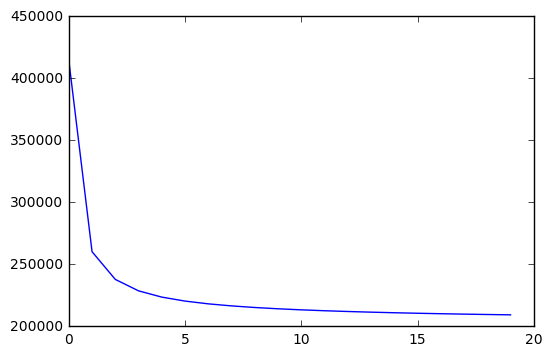

In [44]:
%matplotlib inline
print errors
plt.plot(errors);
#plt.ylim([0, 20000]);

In [45]:
weighted_errors = []
for ii in range(n_iterations):
    for u, Wu in enumerate(W):
        X[u] = np.linalg.solve(np.dot(Y, np.dot(np.diag(Wu), Y.T)) + lambda_ * np.eye(n_factors),
                               np.dot(Y, np.dot(np.diag(Wu), Q[u].T))).T
    for i, Wi in enumerate(W.T):
        Y[:,i] = np.linalg.solve(np.dot(X.T, np.dot(np.diag(Wi), X)) + lambda_ * np.eye(n_factors),
                                 np.dot(X.T, np.dot(np.diag(Wi), Q[:, i])))
    weighted_errors.append(get_error(Q, X, Y, W))
    print('{}th iteration is completed'.format(ii))
weighted_Q_hat = np.dot(X,Y)

0th iteration is completed
1th iteration is completed
2th iteration is completed
3th iteration is completed
4th iteration is completed
5th iteration is completed
6th iteration is completed
7th iteration is completed
8th iteration is completed
9th iteration is completed
10th iteration is completed
11th iteration is completed
12th iteration is completed
13th iteration is completed
14th iteration is completed
15th iteration is completed
16th iteration is completed
17th iteration is completed
18th iteration is completed
19th iteration is completed


In [20]:
(W).shape

(943, 1647)

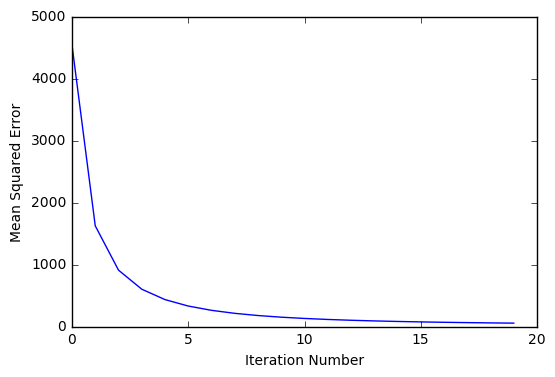

In [47]:
%matplotlib inline
plt.plot(weighted_errors);
plt.xlabel('Iteration Number');
plt.ylabel('Mean Squared Error');

In [23]:
def print_recommendations(W=W, Q=Q, Q_hat=Q_hat, movie_titles=movie_titles):
    #Q_hat -= np.min(Q_hat)
    #Q_hat[Q_hat < 1] *= 5
    Q_hat -= np.min(Q_hat)
    Q_hat *= float(5) / np.max(Q_hat)
    movie_ids = np.argmax(Q_hat - 5 * W, axis=1)
    for jj, movie_id in zip(range(m), movie_ids):
        #if Q_hat[jj, movie_id] < 0.1: continue
        print('User {} liked {}\n'.format(jj + 1, ', '.join([movie_titles[ii] for ii, qq in enumerate(Q[jj]) if qq > 3])))
        print('User {} did not like {}\n'.format(jj + 1, ', '.join([movie_titles[ii] for ii, qq in enumerate(Q[jj]) if qq < 3 and qq != 0])))
        print('\n User {} recommended movie is {} - with predicted rating: {}'.format(
                    jj + 1, movie_titles[movie_id], Q_hat[jj, movie_id]))

        print('\n' + 100 *  '-' + '\n')
#print_recommendations()



In [24]:
movie_data = pd.read_csv('test.csv')
movie_titles = movie_data['_id'].tolist()

In [25]:
print_recommendations(Q_hat=weighted_Q_hat)

NameError: name 'weighted_Q_hat' is not defined